<h1 align="center"><strong>BASES DE PROGRAMACIÓN - PROYECTO 1</strong></h1>
<h1 align="center"><strong>Automatización y Análisis de Bases de Datos Climáticos</strong></h1>

## Maestría en Ciencias de la Tierra

### **Integrantes**: [Janner Galarza](https://www.linkedin.com/in/janner-fernando-galarza-alava-6b07b1211?originalSubdomain=ec),  [Diana Mejía](diaameji@espol.edu.ec), [Jenifer Malave  ](https://www.linkedin.com/in/jenifer-malav%C3%A9-hern%C3%A1ndez-9153a3172/)

---


# **Introducción y Objetivo**

<div style="text-align: justify; margin-bottom: 15px;">
La climatología es la ciencia encargada del estudio del clima, sus cambios en el tiempo y sus diferentes impactos a nivel global (Conrad & Pollak, 1950). Todos los estudios climatológicos están basados en registros o datos del clima para la obtención de análisis climáticos. Los datos climáticos son aquellas observaciones históricas o en tiempo real medidas por las estaciones meteorológicas u obtenidas como resultado de modelos predictivos, y comprenden generalmente temperatura, precipitación, velocidad y dirección del viento, humedad y presión atmosférica. Los análisis climáticos tienen múltiples aplicaciones, ayudando a la obtención de resultados útiles para la toma de decisiones en campos como el de la salud (ej., efectos del clima en la transmisión de virus (El Adlouni et al., 2007)), manejo de recursos hídricos (ej., relación de la variabilidad climática y la evolución de los glaciares (Al‐Yaari et al., 2023)), agricultura (ej., variabilidad espaciotemporal de lluvias y temperatura para la planificación agrícola (Alemayehu et al., 2020)), riesgos (ej., influencia del clima en la ocurrencia de incendios forestales (Gouveia et al., 2024)) y adaptación al cambio climático.
</div>

<div style="text-align: justify;margin-bottom: 15px;">
En este planeta tan cambiante, donde el clima rige muchas de las actividades humanas, la habilidad para manejar e interpretar extensas cantidades de datos climáticos es crucial. Los métodos tradicionales de análisis y visualización de datos suelen requerir mucho tiempo, además de tener limitaciones en capacidad de manejo de datos. En este contexto, herramientas más poderosas y sofisticadas de análisis de datos como las basadas en programación, resultan de gran utilidad para la automatización de procesos, asegurando rapidez, precisión y resultados relevantes (Kanygin & Koretckaia, 2021). Herramientas de programación como R, Matlab y Python son algunas de las más utilizadas, al permitir la gestión de gran cantidad de datos, y generación de análisis matemáticos y estadísticos de forma exitosa (Colliau et al., 2017).
</div>

<div style="text-align: justify; margin-bottom: 15px;">
Python se ha convertido en una herramienta clave para el estudio científico de los datos (Ciencia de Datos), permitiendo completar tareas de limpieza, preparación y análisis de datos mediante algoritmos (Gaurav & Sindhu, 2018). Además, al ser un lenguaje de programación de libre acceso, alto rendimiento, código abierto y relativamente sencillo de aprender, se ha posicionado entre los de mayor preferencia en el mundo (Rawat, 2020). Este lenguaje integra la posibilidad de gestionar datos a través de distintas estructuras de datos como tuplas, listas, conjuntos, diccionarios o arreglos (Lambert, 2014), la realización de análisis matemáticos/estadísticos a partir del uso de librerías como Pandas y Numpy (Hassan Sial et al., 2021), la construcción de elementos de visualización gráfica mediante librerías como Matplotlib y Seaborn (Oberoi & Chauhan, 2019); y la automatización de procesos mediante funciones y bucles.
</div>

<div style="text-align: justify; margin-bottom: 15px;">
En este sentido, resulta importante conocer la aplicabilidad de las herramientas y recursos de Python para la comprensión integral de un conjunto de datos de forma automatizada. El objetivo de este proyecto es automatizar el proceso de carga, limpieza, análisis y visualización de un conjunto de datos climáticos mediante el uso de bucles y funciones, para el mejoramiento de la eficiencia y reproducibilidad del análisis de la información.
</div>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **1. Carga y Preparación de Datos**

 ### **1.1) Carga de la base de datos metereológicos**

In [2]:
data = pd.read_csv('Weather_Data-1.csv')
print (data.head())

       Location        Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  1/14/2024 21:12      10.683001     41.195754   
1     San Diego  5/17/2024 15:22       8.734140     58.319107   
2     San Diego   5/11/2024 9:30      11.632436     38.820175   
3  Philadelphia  2/26/2024 17:32      -8.628976     54.074474   
4   San Antonio  4/29/2024 13:23      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


 ### **1.2) Eliminación de duplicados**

In [3]:
#Para eliminar los duplicados se realizó una función 
def eliminar_duplicados(df):
    return df.drop_duplicates()
    
data = eliminar_duplicados(data)

### **1.3) Modificación de tipo de dato y validación de filas y columnas**

In [4]:
#Para conocer si dedemos modificar o no los tipos de datos primero deberíamos conocer qué tipo de datos tenemos
#Para eso se usó el metodo .info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [5]:
# Ahora generaremos una función para cambiar el tipo de dato, la función aplica para cualquier
#cambio, pero en este caso particular para nuestro proyecto cambiaremos el formato de la fecha

def cambiar_tipodatos(df, columna, tipo):
    df[columna] = df[columna].astype(tipo)
    return df

data = cambiar_tipodatos(data, 'Date_Time', 'datetime64[ns]') 
print (data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Location          1000000 non-null  object        
 1   Date_Time         1000000 non-null  datetime64[ns]
 2   Temperature_C     1000000 non-null  float64       
 3   Humidity_pct      1000000 non-null  float64       
 4   Precipitation_mm  1000000 non-null  float64       
 5   Wind_Speed_kmh    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 45.8+ MB
None


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622


### **1.4) Mejora de la presentación de los datos**

In [ ]:
# Para mejorar la presentación de los datos cambiaremos el nombre de las columnas

def cambiar_nombre_columnas(df, nuevos_nombres):
    df.rename(columns=nuevos_nombres, inplace = True)
    return df

nuevos_nombres = {"Date_Time":"Date Time", "Temperature_C":"Temperature (C)", "Humidity_pct":"Humidity (pct)", "Precipitation_mm":"Precipitation (mm)", "Wind_Speed_kmh":"Wind Speed (Km/h)"}
data = cambiar_nombre_columnas(data, nuevos_nombres)
data.head()

## **Metodología y Resultados**

### **1.5) Resumen estadístico de los datos**

In [7]:
data.describe()

,Date Time,Temperature (C),Humidity (pct),Precipitation (mm),Wind Speed (Km/h)
count,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2024-03-10 10:40:29.383980544,14.779705,60.021830,5.109639,14.997598
min,2024-01-01 00:00:00,-19.969311,30.000009,0.000009,0.000051
25%,2024-02-04 16:28:00,2.269631,45.008500,2.580694,7.490101
50%,2024-03-10 11:43:00,14.778002,60.018708,5.109917,14.993777
75%,2024-04-14 03:51:00,27.270489,75.043818,7.613750,22.514110
max,2024-05-18 19:44:00,39.999801,89.999977,14.971583,29.999973
std,NaN,14.482558,17.324022,2.947997,8.663556


# **2. Automatización del Análisis Exploratorio de Datos (EDA)**

### **2.1) Almacenamiento y manipulación de información relevante**

In [8]:
#Para este paso utilizaremos tuplas y como información relevante tomaremos a las columnas de Fecha, temperatura, velocidad del viento, ubicacion y precipitacion
data_relevante = data [["Temperature (C)","Precipitation (mm)","Date Time","Location","Wind Speed (Km/h)"]]

#Seguido elaboraremos una funcion que sea capaz de calcular las estadísticas de nuestra tupla
def calcular_estadisticas(df, columna):
    media = df[columna].mean()
    mediana = df[columna].median()
    desviacion = df[columna].std()
    return media, mediana, desviacion

media_temp, mediana_temp, desviacion_temp = calcular_estadisticas(data_relevante, "Temperature (C)")
media_preci, mediana_preci, desviacion_preci = calcular_estadisticas(data_relevante, "Precipitation (mm)")

print(f"Datos de Temperatura:\n-Media: {media_temp}\n-Mediana: {mediana_temp}\n-Desviación Estándar: {desviacion_temp}")
print("")
print(f"Datos de Precipitación:\n-Media: {media_preci}\n-Mediana: {mediana_preci}\n-Desviación Estándar: {desviacion_preci}")

Datos de Temperatura:
-Media: 14.779704927041585
-Mediana: 14.778002115
-Desviación Estándar: 14.482558096887805

Datos de Precipitación:
-Media: 5.109639125976419
-Mediana: 5.109917161
-Desviación Estándar: 2.9479970526541917


### **2.2) Análisis específicos al conjunto de datos**

#### **2.2.1) ¿Cuál es la fecha con la temperatura promedio más alta?**

In [9]:
FechaCalor = data_relevante.groupby("Date Time")["Temperature (C)"].mean().idxmax()
print(f"La fecha con la temperatura promedio más alta es: {FechaCalor}")

La fecha con la temperatura promedio más alta es: 2024-03-06 21:25:00


#### **2.2.2) ¿Cuál es el año más lluvioso?**

In [10]:
AñoLluvioso = data_relevante.groupby("Date Time")["Precipitation (mm)"].sum().idxmax()
print(f"El año con más lluvias es: {AñoLluvioso}")

El año con más lluvias es: 2024-01-10 02:12:00


#### **2.2.3) ¿Cuál es la ciudad más ventosa?**

In [11]:
CiudadViento = data_relevante.groupby("Location")["Wind Speed (Km/h)"].mean().idxmax()
print(f"La ciudad con más viento es: {CiudadViento}")

La ciudad con más viento es: San Diego


# **3. Manipulación de Datos con Pandas**

### **3.1.) Funciones de agrupamiento y agregación**

In [12]:
# Creación de una función para agrupar y agregar
def agrupar_y_agregar (df, grupo, columna, funcion):
    return df.groupby(grupo)[columna].agg(funcion).reset_index()

In [13]:
#Explorando el promedio de la velocidad del viento por ciudad
mediaWind_porCiudad = agrupar_y_agregar(data, "Location", "Wind Speed (Km/h)", 'mean')
mediaWind_porCiudad
#print(data)

,Location,Wind Speed (Km/h)
0,Chicago,14.999501
1,Dallas,15.022001
2,Houston,14.989935
3,Los Angeles,15.035120
4,New York,14.989398
5,Philadelphia,14.990663
6,Phoenix,14.983904
7,San Antonio,14.956579
8,San Diego,15.037633
9,San Jose,14.971369


In [14]:
#Explorando la temperatura máxima por ciudad
maxTemp_porCiudad = agrupar_y_agregar(data, "Location", "Temperature (C)", 'max')
maxTemp_porCiudad

,Location,Temperature (C)
0,Chicago,39.998561
1,Dallas,39.998804
2,Houston,39.998913
3,Los Angeles,39.999592
4,New York,39.999801
5,Philadelphia,39.999642
6,Phoenix,39.998889
7,San Antonio,39.998343
8,San Diego,39.999692
9,San Jose,39.999015


### **3.2.) Filtrado de datos**

In [15]:
### Creación de función para filtrar y seleccionar datos utilizando métodos avanzandos de Pandas
def filtrar_datos(df, columna, condicion):
    return df[df[columna] == condicion]

#Filtrado de datos por ciudad
datos_por_ciudad = filtrar_datos(data, "Location", "San Jose")
datos_por_ciudad

,Location,Date Time,Temperature (C),Humidity (pct),Precipitation (mm),Wind Speed (Km/h)
6,San Jose,2024-01-13 02:10:00,1.881883,65.742325,0.221709,1.073112
9,San Jose,2024-05-18 09:14:00,-1.607088,82.198701,4.101493,25.647282
23,San Jose,2024-04-22 03:13:00,34.539654,57.793010,3.583560,13.044745
25,San Jose,2024-03-05 21:38:00,-1.733200,47.973206,7.066382,3.430741
49,San Jose,2024-05-08 20:16:00,35.097440,40.225820,6.088406,20.013380
...,...,...,...,...,...,...
999932,San Jose,2024-05-07 03:10:00,36.462987,54.691087,9.135078,17.524197
999962,San Jose,2024-05-16 22:35:00,24.326973,58.667543,2.238676,26.798245
999969,San Jose,2024-01-07 06:52:00,19.964541,86.875155,5.353166,19.146324
999971,San Jose,2024-02-07 18:39:00,38.428298,42.200630,2.999543,10.208343


### **3.3.) Creación de columnas derivadas**

In [16]:
# Para esto vamos a crear la columna correspondiente al valor de sensacion termica a partir de la humedad y la temperatura
def calcularSensacionTermica(df):
    df["sensacion_termica"] = df["Temperature (C)"] - ((100 - df["Humidity (pct)"])/5)
    return df

sensTermica = calcularSensacionTermica(data)
data.head()
## Ahora guardaremos el DataFrame modificado como archivo de Excel con el siguiente codigo.
#data.to_excel("Datos_modificados.xlsx", index=False)

,Location,Date Time,Temperature (C),Humidity (pct),Precipitation (mm),Wind Speed (Km/h),sensacion_termica
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,-1.077848
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,0.397961
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,-0.603529
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,-17.814081
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,34.388195


# **4. Visualización Automatizada de Datos**

### **4.1.) Gráficos de línea usando funciones (librería Plotly)**

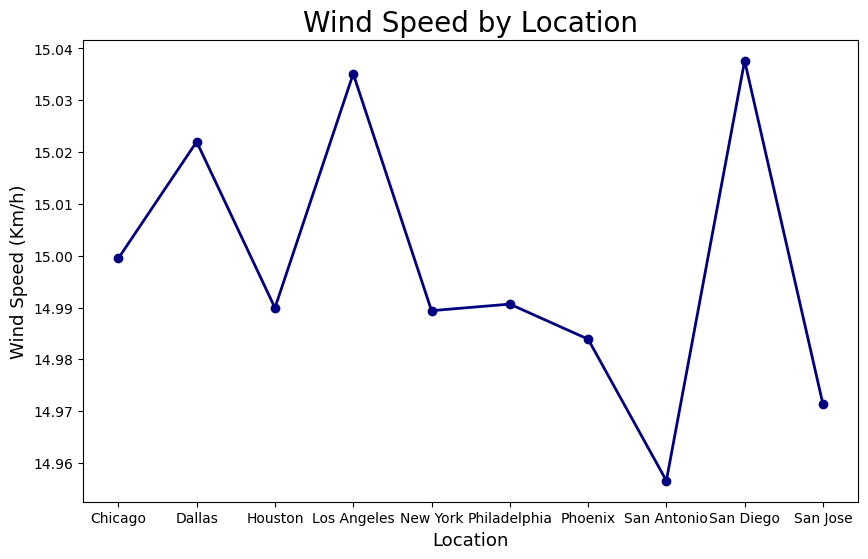

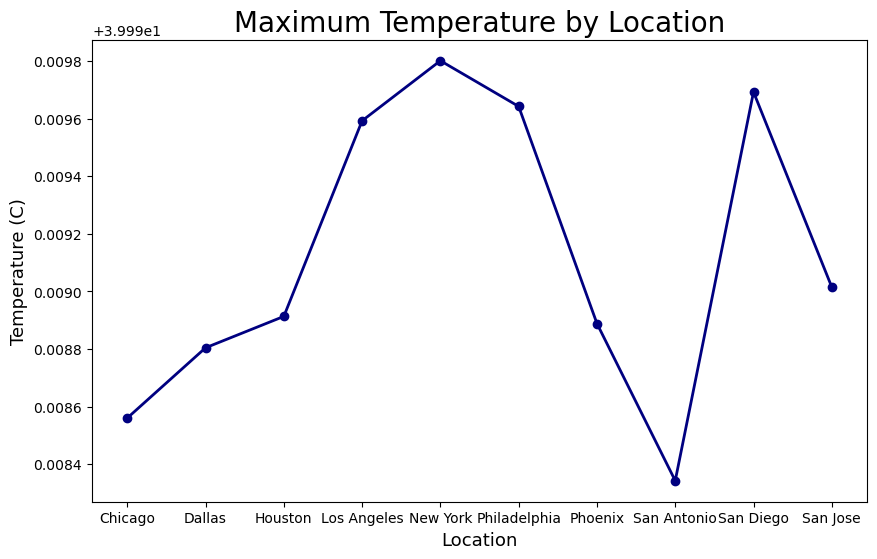

In [17]:
#plt.rcParams["agg.path.chunksize"] = 
def graficolinea(df, x, y, titulo):
    font1 = {'color':'k','size':20}
    font2 = {'color':'k','size':13}
    plt.figure(figsize=(10,6))
    plt.plot(df[x], df[y], marker = "o", markersize = 6, color = "navy", lw = 2)
    plt.title(titulo, fontdict = font1)
    plt.xlabel(x, fontdict = font2)
    plt.ylabel(y, fontdict = font2)
    plt.show()

grafico = graficolinea(mediaWind_porCiudad, "Location", "Wind Speed (Km/h)", "Wind Speed by Location")
grafico2 = graficolinea(maxTemp_porCiudad, "Location", "Temperature (C)", "Maximum Temperature by Location")

### **4.2.) Histogramas usando funciones (librería Seaborn)**

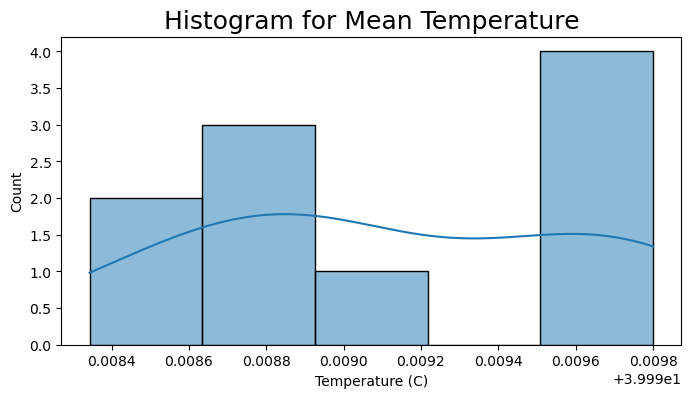

In [18]:
def histograma (df, column, titulo, xlabel, figsize=(8, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    font1 = {'color':'k','size':18}
    ax.set_title(titulo, fontdict = font1)
    ax.set_xlabel(xlabel)
    plt.show()
grafhistograma = histograma(maxTemp_porCiudad, "Temperature (C)", "Histogram for Mean Temperature", "Temperature (C)")


### **4.3.) Diagramas de caja y bigote usando funciones (librería Seaborn)**

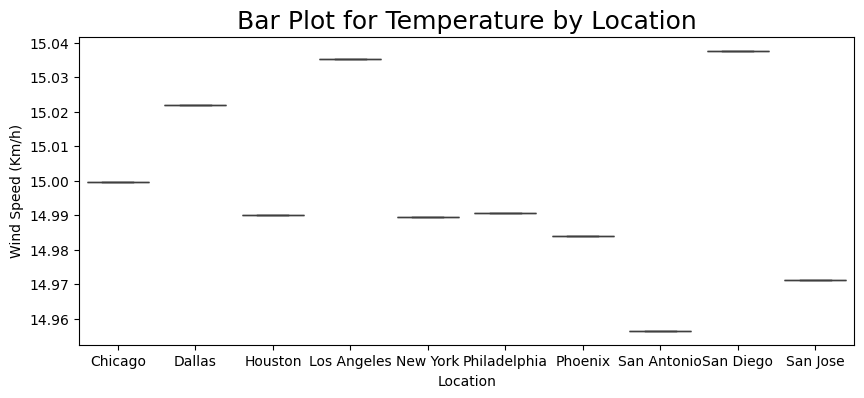

In [19]:
def graficoCaja(df, x, y, titulo):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[x], y=df[y])
    font1 = {'color':'k','size':18}
    plt.title(titulo, fontdict = font1)
    plt.show()

graficoCaja(mediaWind_porCiudad, 'Location', 'Wind Speed (Km/h)', 'Bar Plot for Temperature by Location')


### **4.4.) Generación y guardado automatizado de gráficos**

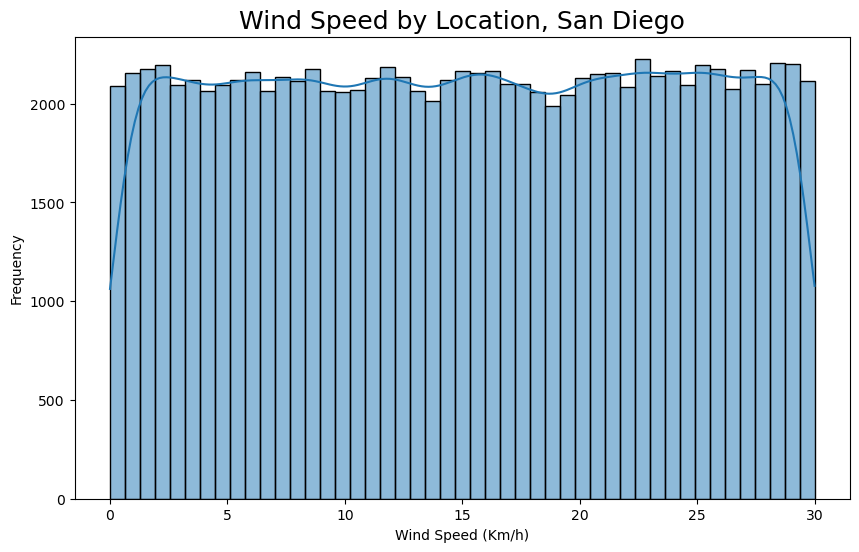

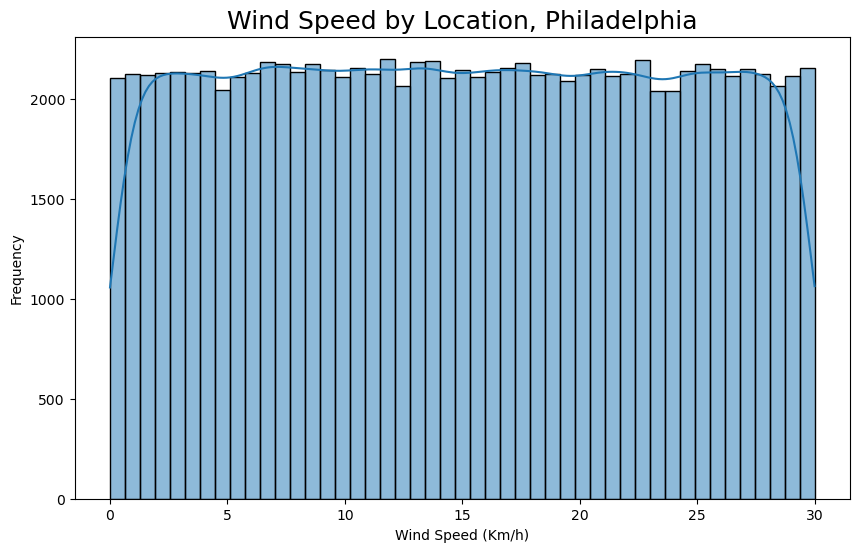

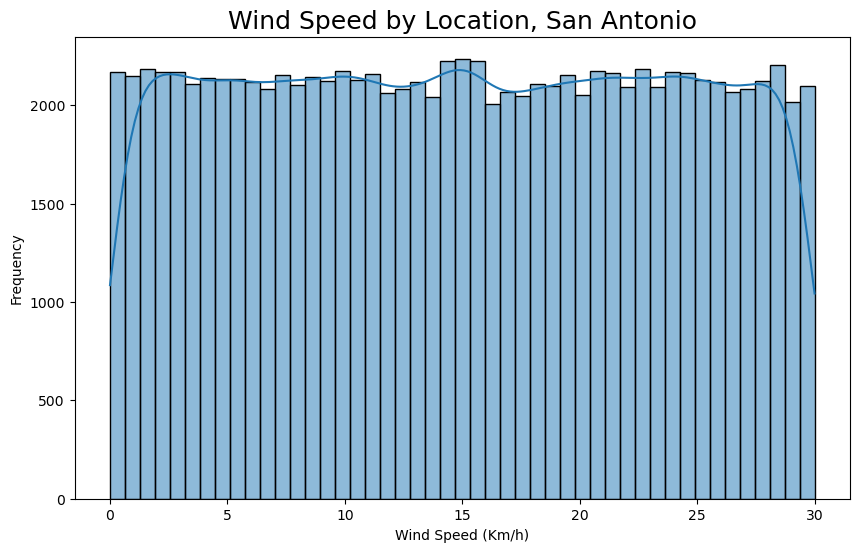

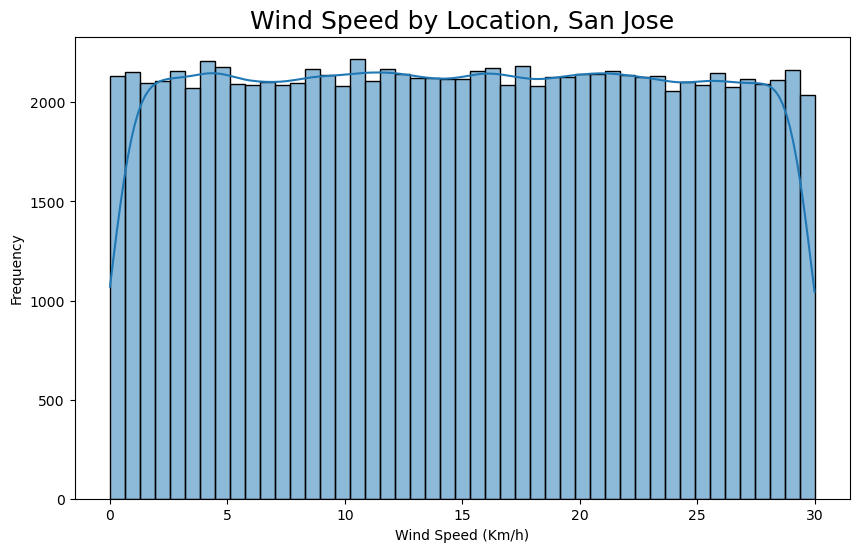

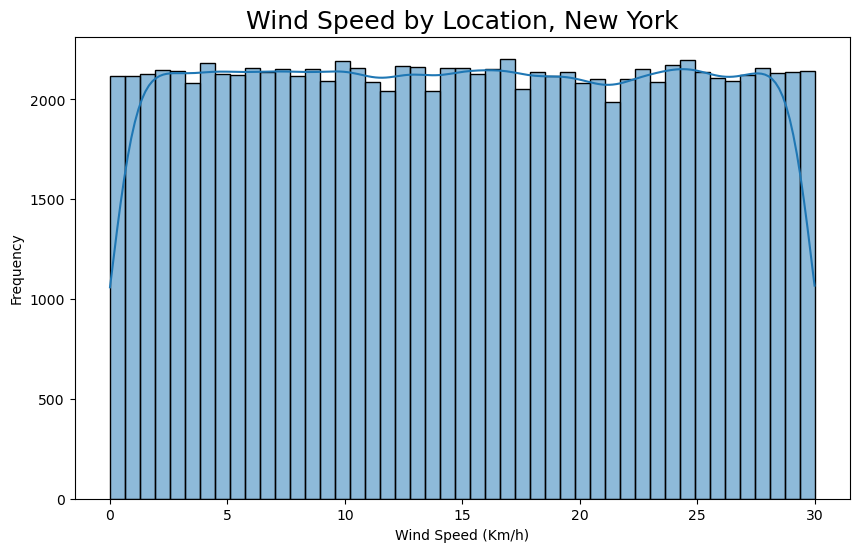

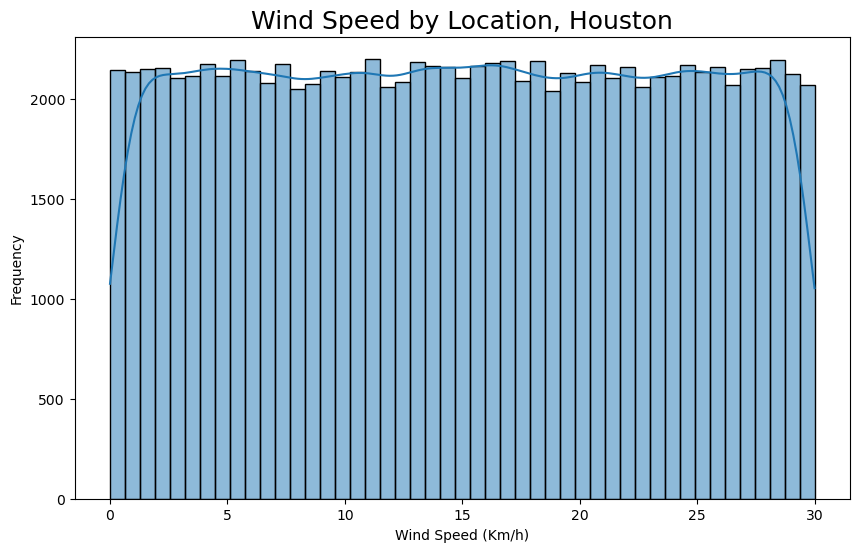

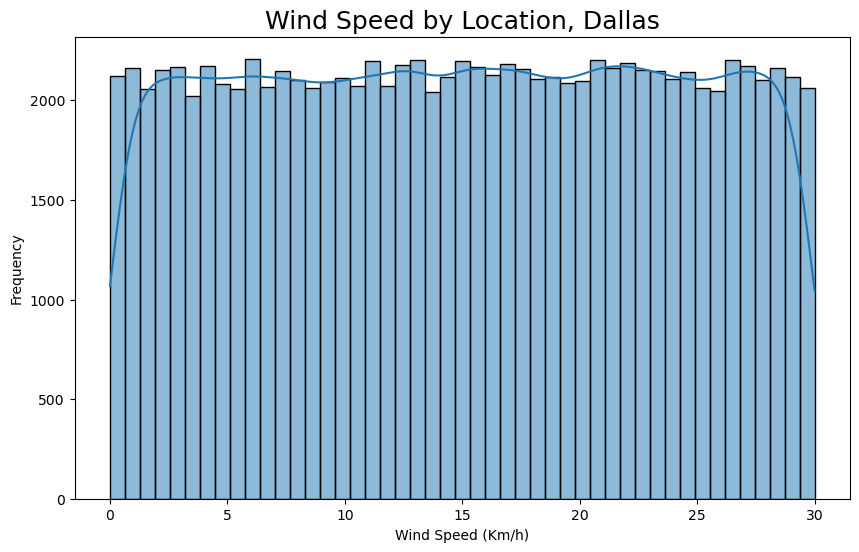

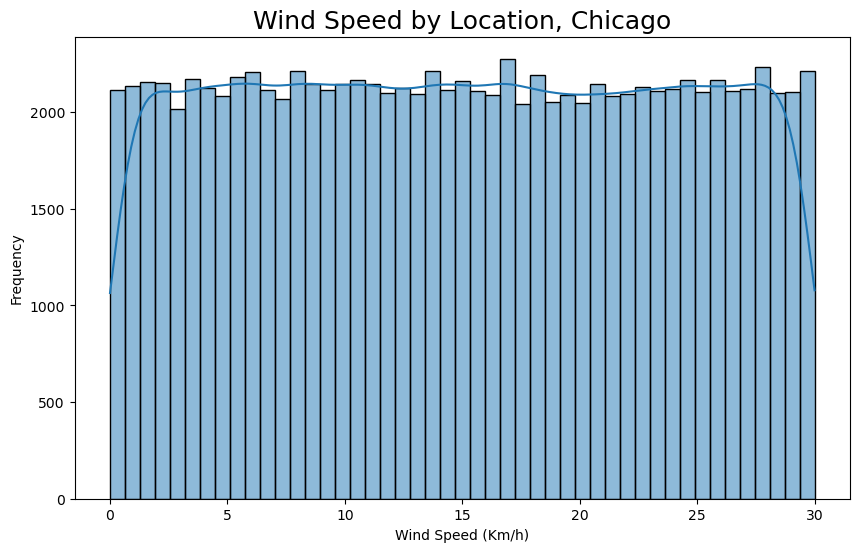

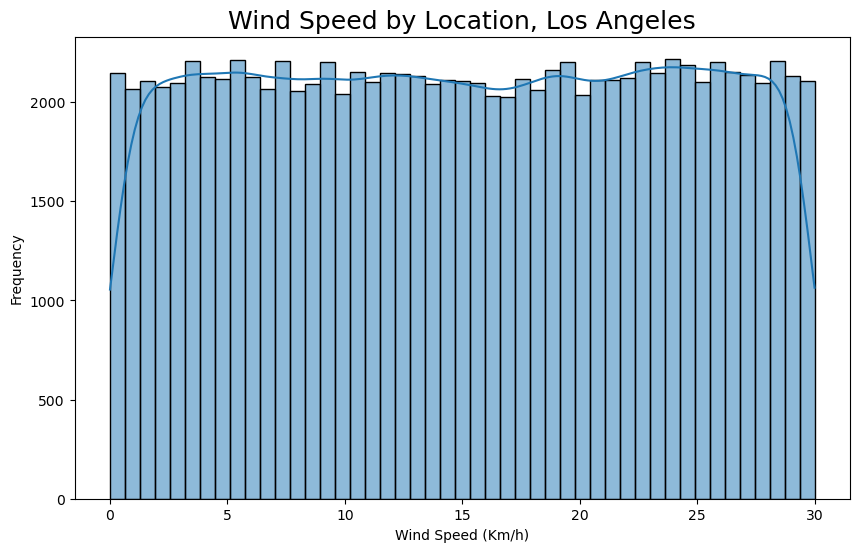

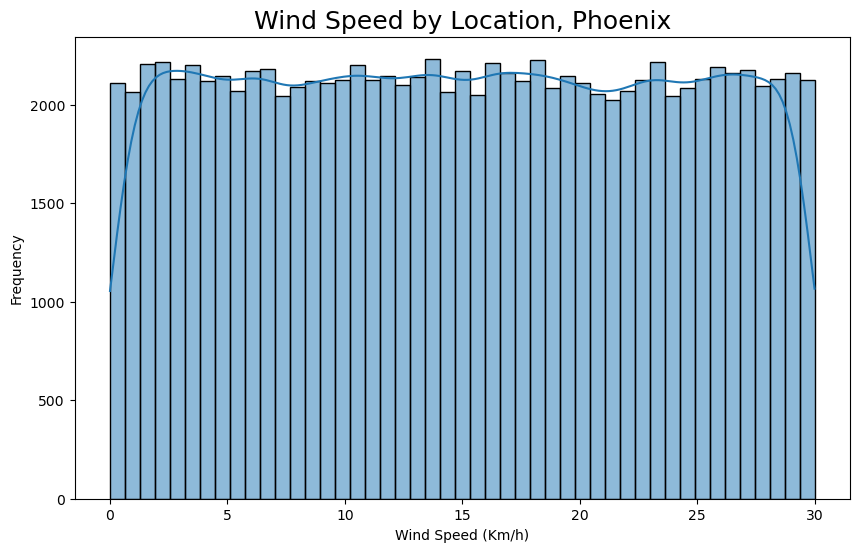

In [20]:
def graficoBucle(df, def1, def2, xlabel, ylabel, titulo):
    ciudades = df[def1].unique()
    for ciudad in ciudades:
        df_ciudad = df[df[def1]==ciudad]

        fig, ax = plt.subplots(figsize=(10,6))
        sns.histplot(df_ciudad, x = def2, kde=True)
        font1 = {'color':'k','size':18}
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(f"{titulo}, {ciudad}", fontdict = font1)
        plt.show()

        fig_filename = f"Speed Wind_{ciudad}.png"
        fig.savefig(fig_filename, dpi = 400)

    
graficoBucle(data, def1 ="Location", def2 = "Wind Speed (Km/h)", xlabel ="Wind Speed (Km/h)", ylabel = "Frequency", titulo = "Wind Speed by Location")


## **Conclusiones**
#### - El análisis de datos climatológicos empleando Python permiten comprender los patrones climáticos a largoplazo y construir modelos climatológicos de futuros escenarios.
#### - El uso de funciones en Python presenta ventajas como: optimización y rendimiento, mejora la estructura, código más claro y facilita la identificación de los errores para su posterior depuración.
#### - Los gráficos proporcionados por las librerías Matplotlib y Seaborn son clave para análisis de tendencias, simulación de modelos climáticos futuros y es  fundamental en el monitoreo ambiental.

## **Recomendaciones**
#### - Simplificar el nombre otorgador a las variables para mayor facilidad en su uso dentro del código.
#### - Reasignar nombre a las columnas del DataFrame para que sean más sencillas al momento de llamarlas en el código y así mismo se presenten de una manera más amigable y estetica al usuario que vera el resultado final.

 

## **Bibliografía**

<div style="text-align: justify;margin-bottom: 10px;">
Al‐Yaari, A., Condom, T., Junquas, C., Rabatel, A., Ramseyer, V., Sicart, J., Masiokas, M., Cauvy‐Fraunié, S., & Dangles, O. (2023). Climate Variability and Glacier Evolution at Selected Sites Across the World: Past Trends and Future Projections. Earth’s Future, 11(10). https://doi.org/10.1029/2023EF003618
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Alemayehu, A., Maru, M., Bewket, W., & Assen, M. (2020). Spatiotemporal variability and trends in rainfall and temperature in Alwero watershed, western Ethiopia. Environmental Systems Research, 9(1), 22. https://doi.org/10.1186/s40068-020-00184-3
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Colliau, T., Rogers, G., Hughes, Z., & Ozgur, C. (2017). MatLab vs. Python vs. R. Journal of Data Science, 15(3), 355–372.
Conrad, V., & Pollak, L. W. (1950). Methods in Climatology. Harvard University Press. https://doi.org/10.4159/harvard.9780674187856
</div>

<div style="text-align: justify;margin-bottom: 10px;">
El Adlouni, S., Beaulieu, C., Ouarda, T. B., Gosselin, P. L., & Saint-Hilaire, A. (2007). Effects of climate on West Nile Virus transmission risk used for public health decision-making in Quebec. International Journal of Health Geographics, 6(1), 40. https://doi.org/10.1186/1476-072X-6-40
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Gaurav, & Sindhu, R. (2018). Python as a key for Data Science. International Journal of Computer Sciences and Engineering, 6(4), 325–328. https://doi.org/10.26438/ijcse/v6i4.325328
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Gouveia, J. R. F. de, Nascimento, C. R., Silva, H. C. da, Moura, G. B. de A., & Lopes, P. M. O. (2024). Influência de eventos climáticos extremos na ocorrência de queimadas e no poder de regeneração vegetal. Revista Brasileira de Geografia Física, 17(2), 1098–1113. https://doi.org/10.26848/rbgf.v17.2.p1098-1113
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Hassan Sial, A., Shah Rashdi, S. Y., & Hafeez Khan, A. (2021). Comparative Analysis of Data Visualization Libraries Matplotlib and Seaborn in Python. International Journal of Advanced Trends in Computer Science and Engineering, 10(1), 277–281. https://doi.org/10.30534/ijatcse/2021/391012021
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Kanygin, G., & Koretckaia, V. (2021). Analytical Coding: Performing Qualitative Data Analysis Based on Programming Principles. The Qualitative Report. https://doi.org/10.46743/2160-3715/2021.4342
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Lambert, K. A. (2014). Fundamentals of Python: Data Structures, Second Edition. Cengage Learning PTR. http://kennethalambert.com/python/cs2pythonv2/TOC.pdf
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Oberoi, A., & Chauhan, R. (2019). Visualizing data using Matplotlib and Seaborn libraries in Python for data science. International Journal of Scientific and Research Publications (IJSRP), 9(3), p8733. https://doi.org/10.29322/IJSRP.9.03.2019.p8733
</div>

<div style="text-align: justify;margin-bottom: 10px;">
Rawat, A. (2020). A Review on Python Programming. International Journal of Research in Engineering, Science and Management, 3(12), 8–11. https://journal.ijresm.com/index.php/ijresm/article/view/395
</div>
